In [1]:
import numpy as np
import os
import shutil
import skimage.io as io
import matplotlib.pyplot as plt

In [2]:
base_dir = '/data/models/20190606_params/'

In [3]:
data_3_class = np.load(base_dir + 'Point1_12_18_3X_interior_border_border_3_class_64_filters_256_densefilters_epoch_30_metrics.npy')

In [4]:
data_4_class = np.load(base_dir + 'Point1_12_18_3X_interior_border_border_4_class_unbalanced_64_filters_256_densefilters_epoch_40_metrics.npy')

In [5]:
data_watershed = np.load('/data/models/20190606_params/Point1_12_18_3X_interior_border_border_watershed_128_filters_balanced_epoch_40_metrics.npy')
data_watershed = data_watershed[..., 0:4]

In [6]:
argmax_images = []
for i in range(data_watershed.shape[0]):
    argmax_images.append(np.argmax(data_watershed[i], axis=-1))
argmax_images = np.array(argmax_images)
argmax_images = np.expand_dims(argmax_images, axis=-1)

print('watershed argmax shape:', argmax_images.shape)

watershed argmax shape: (4, 1024, 1024, 1)


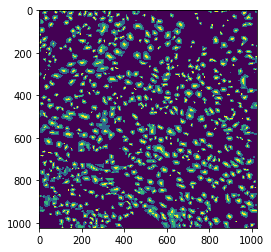

In [7]:
plt.imshow(argmax_images[3, :, :, 0])

In [8]:
template_dir = '/data/contour_data/Point1_12_18_23_3X'

In [9]:
dirs = os.listdir(template_dir)
dirs = [dir for dir in dirs if 'Point' in dir]
dirs.sort()

In [43]:
new_dir = '/data/contour_data/Point1_12_18_23_20190606_output'

In [22]:
os.makedirs(new_dir)

In [44]:
for idx, directory in enumerate(dirs):
    if not os.path.isdir(os.path.join(new_dir, directory)):
        os.makedirs(os.path.join(new_dir, directory))
        os.makedirs(os.path.join(new_dir, directory, 'annotated'))
        os.makedirs(os.path.join(new_dir, directory, 'raw'))
        file = os.listdir(os.path.join(template_dir, directory, 'annotated'))
        file = file[1]
        shutil.copy(os.path.join(template_dir, directory, 'annotated', file), os.path.join(new_dir, directory, 'annotated', file))
    io.imsave(os.path.join(new_dir, directory, 'raw', 'border_3_class.tiff'), data_3_class[idx, :, :, 0])
    io.imsave(os.path.join(new_dir, directory, 'raw', 'interior_3_class.tiff'), data_3_class[idx, :, :, 1])
    io.imsave(os.path.join(new_dir, directory, 'raw', 'border_4_class_1.tiff'), data_4_class[idx, :, :, 0])
    io.imsave(os.path.join(new_dir, directory, 'raw', 'border_4_class_2.tiff'), data_4_class[idx, :, :, 1])
    io.imsave(os.path.join(new_dir, directory, 'raw', 'interior_4_class.tiff'), data_4_class[idx, :, :, 2])
    io.imsave(os.path.join(new_dir, directory, 'raw', 'watershed_argmax.tiff'), argmax_images[idx, :, :, 0])
    
        

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:140: UserWarning: /data/contour_data/Point1_12_18_23_20190606_output/Point1/raw/watershed_argmax.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:140: UserWarning: /data/contour_data/Point1_12_18_23_20190606_output/Point12/raw/watershed_argmax.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:140: UserWarning: /data/contour_data/Point1_12_18_23_20190606_output/Point18/raw/watershed_argmax.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:140: UserWarning: /data/contour_data/Point1_12_18_23_20190606_output/Point23/raw/watershed_argmax.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


In [10]:
from deepcell.utils.data_utils import make_training_data
from deepcell.utils.data_utils import get_data
from deepcell.utils.io_utils import get_image_sizes
DATA_DIR = "/data/contour_data/"
DATA_FILE = "Point1_12_18_23_20190606_output"

/usr/local/lib/python3.5/dist-packages/deepcell/utils/__init__.py:49: UserWarning: To use `compute_overlap`, the C extensions must be built using `python setup.py build_ext --inplace`
  warnings.warn('To use `compute_overlap`, the C extensions must be built '


In [5]:
make_training_data(
    #channel_names=['border_3_class.tiff', 'border_4_class_1.tiff', 'border_4_class_2.tiff'],
    #channel_names=['border_3_class.tiff', 'interior_3_class.tiff'],
    #channel_names=['border_3_class.tiff', 'interior_3_class.tiff', 'border_4_class_1.tiff'],
    #channel_names=['border_3_class.tiff', 'interior_3_class.tiff', 'interior_4_class.tiff', 
    #               'border_4_class_1.tiff', 'border_4_class_2.tiff'],
    #channel_names=['border_3_class.tiff', 'border_4_class_1.tiff', 'interior_3_class.tiff', 'watershed_argmax.tiff'],
    channel_names=['border_3_class.tiff', 'interior_3_class.tiff', 'watershed_argmax.tiff'],

    file_name_save=os.path.join("/data/npz_data", "Point1_12_18_23_20190606_output_3_class_w_watershed"),
    dimensionality=2,
    annotation_direc="annotated",
    annotation_name='Nuclear_Interior_Border_Mask_Label',
    reshape_size=None,
    training_direcs=None,
    raw_image_direc="raw",
    direc_name=os.path.join(DATA_DIR, DATA_FILE)
)

In [4]:
training_data = np.load(os.path.join('/data/npz_data', 
                                     "Point1_12_18_20190606_output_3_class_w_watershed" + ".npz"))

X, y = training_data["X"], training_data["y"]
print("X.shape: {} & y.shape: {}".format(X.shape, y.shape))


X.shape: (3, 1024, 1024, 3) & y.shape: (3, 1024, 1024, 1)


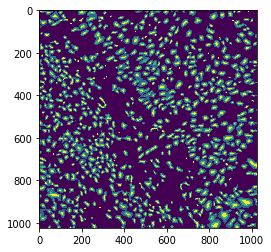

In [7]:
plt.imshow(X[2, :, :, 2])